In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Load the dataset into python environment

In [ ]:
df=pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Make ‘PassengerId’ as the index column

In [ ]:
df.set_index('PassengerId', inplace=True)

3. Check the basic details of the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4)Fill in all the missing values present in all the columns in the dataset

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

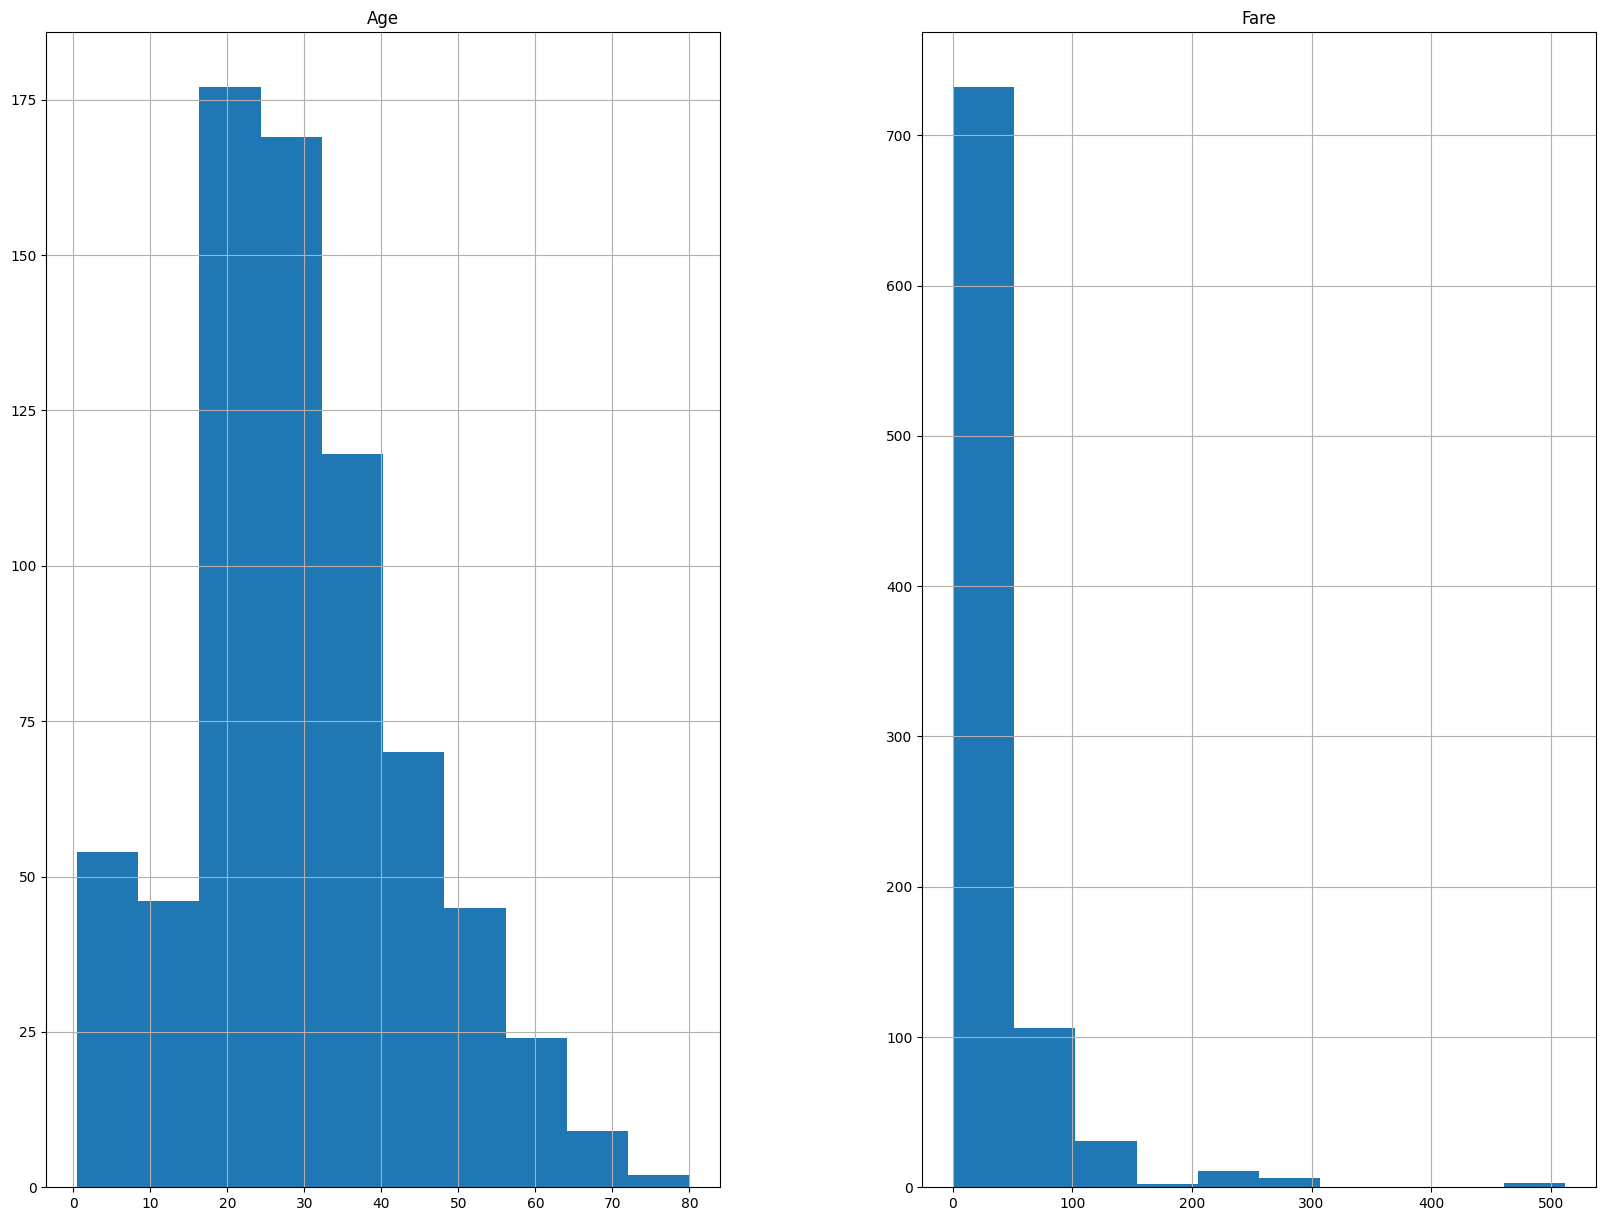

In [ ]:
freqgraph=df.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
freqgraph = df.select_dtypes(include=['number', 'datetime'])

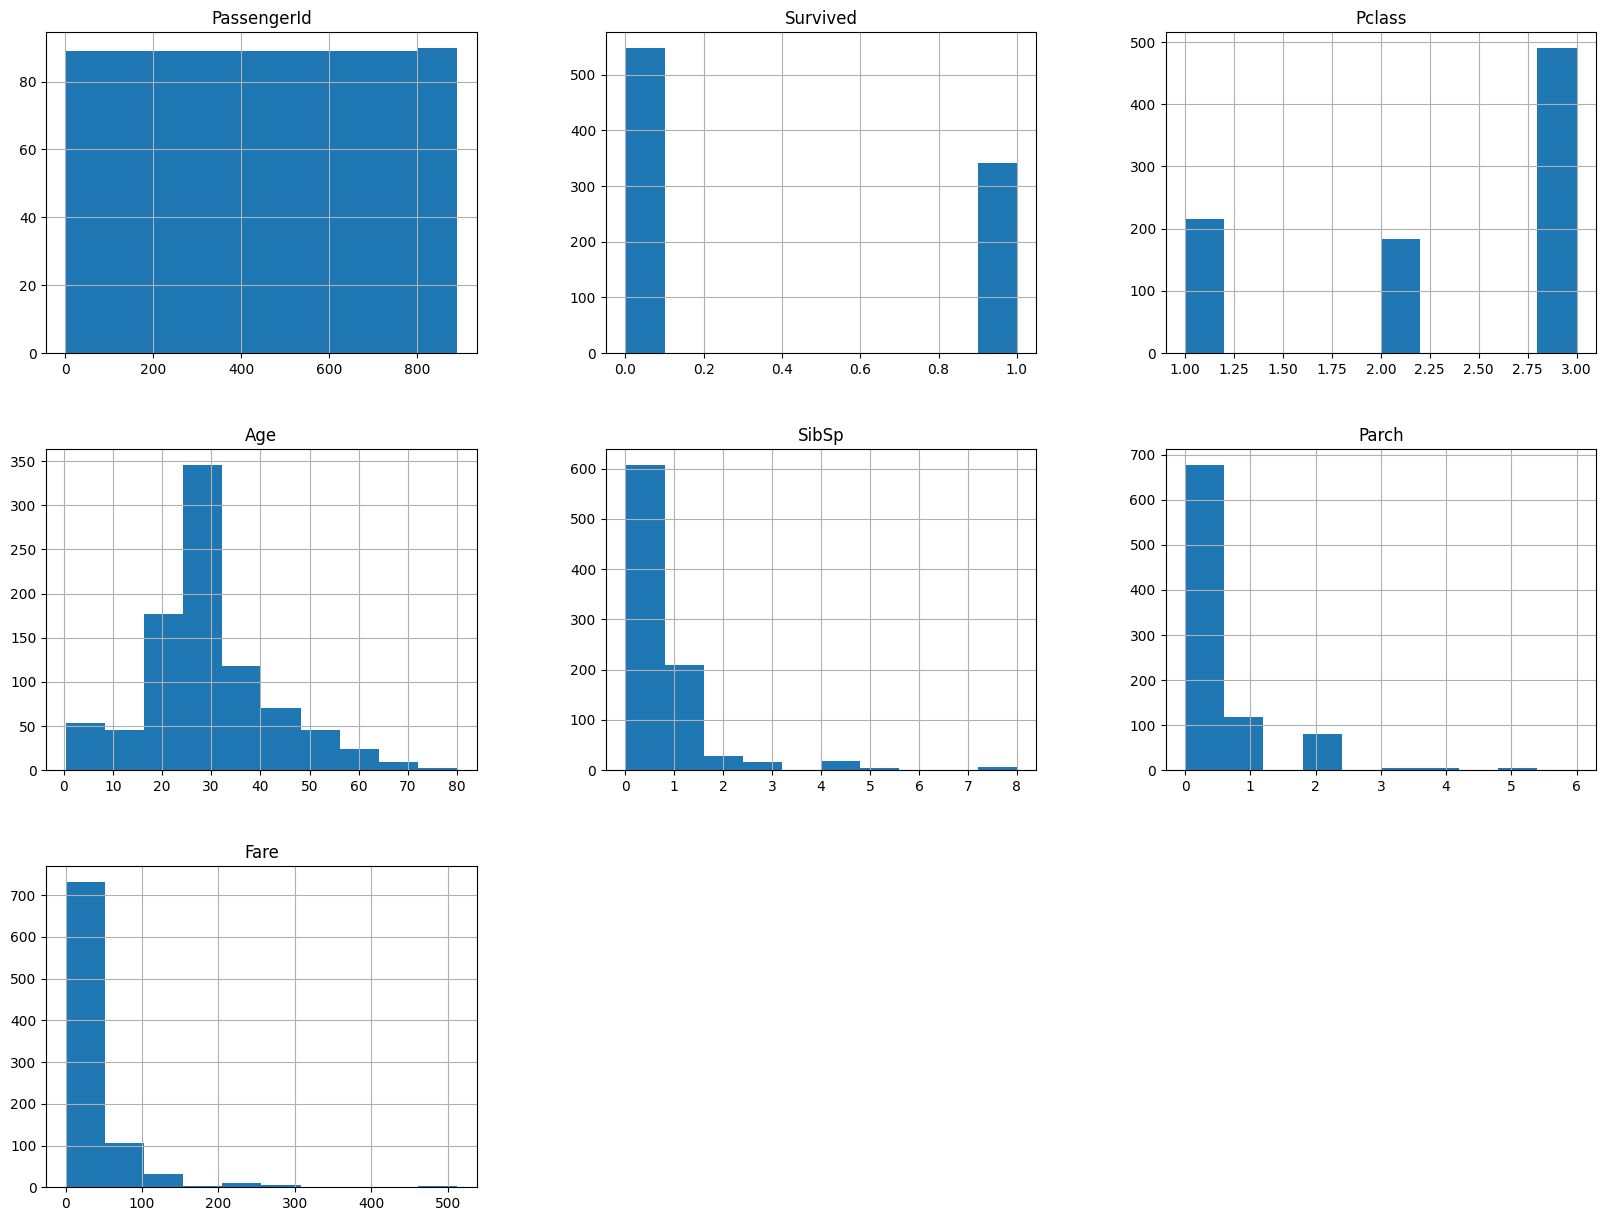

In [ ]:
freqgraph.hist(figsize=(20, 15))
plt.show()

In [ ]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

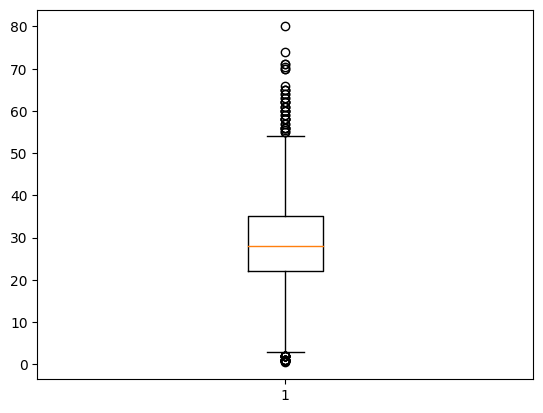

In [ ]:
num=['Age',]
for i in num:
  plt.figure()
  plt.boxplot(df['Age'])
  plt.show();

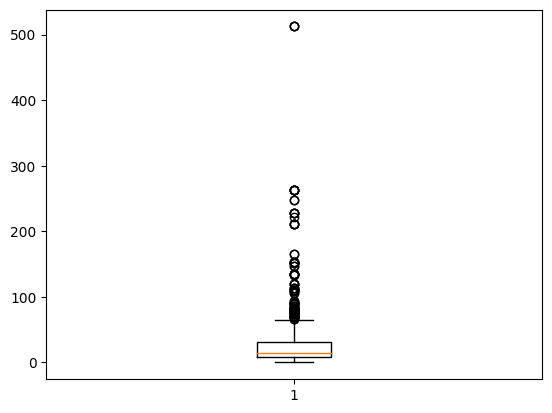

In [ ]:
num=['Fare',]
for i in num:
  plt.figure()
  plt.boxplot(df['Fare'])
  plt.show();

In [ ]:
# 'Age'
Q1 = np.percentile(df['Age'],25,method='midpoint')
Q2 = np.percentile(df['Age'],50,method='midpoint')
Q3 = np.percentile(df['Age'],75,method='midpoint')


In [ ]:
print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

Q1 is:  22.0
Q2 is:  28.0
Q3 is:  35.0


In [ ]:
IQR =Q3 - Q1
print(IQR)

13.0


In [ ]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 +1.5*IQR

print("lower value: ",low_lim)
print("Upper value: ",up_lim)

lower value:  2.5
Upper value:  54.5


In [ ]:
outliers =[]

for x in df['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)


print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [ ]:
df['Age'] = df['Age'].clip(lower=low_lim ,upper=up_lim)

In [ ]:
outliers =[]

for x in df['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)


print(outliers)

[]


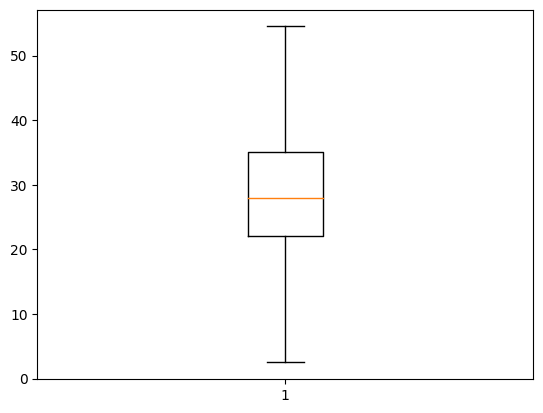

In [ ]:
plt.boxplot(df['Age'])
plt.show();

In [ ]:
# 'Fare'
Q1 = np.percentile(df['Fare'],25,method='midpoint')
Q2 = np.percentile(df['Fare'],50,method='midpoint')
Q3 = np.percentile(df['Fare'],75,method='midpoint')

In [ ]:
print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

Q1 is:  7.9104
Q2 is:  14.4542
Q3 is:  31.0


In [ ]:
IQR =Q3 - Q1
print(IQR)

23.0896


In [ ]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 +1.5*IQR

print("lower value: ",low_lim)
print("Upper value: ",up_lim)

lower value:  -26.724
Upper value:  65.6344


In [ ]:
outliers =[]

for x in df['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)


print(outliers)

[]


In [ ]:
df['Fare'] = df['Fare'].clip(lower=low_lim ,upper=up_lim)

In [ ]:
outliers =[]

for x in df['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)


print(outliers)

[]


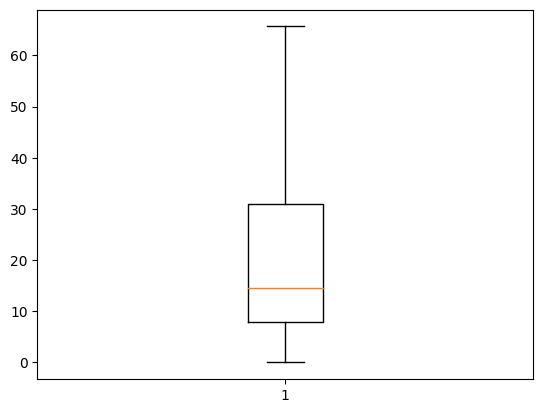

In [ ]:
plt.boxplot(df['Fare'])
plt.show();

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
x=df[['Pclass','Age','SibSp','Parch','Fare']]
x_mm=minmax.fit_transform(x)
x_mm=pd.DataFrame(x_mm)

In [ ]:
x_mm.describe()

,0,1,2,3,4
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.247612,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


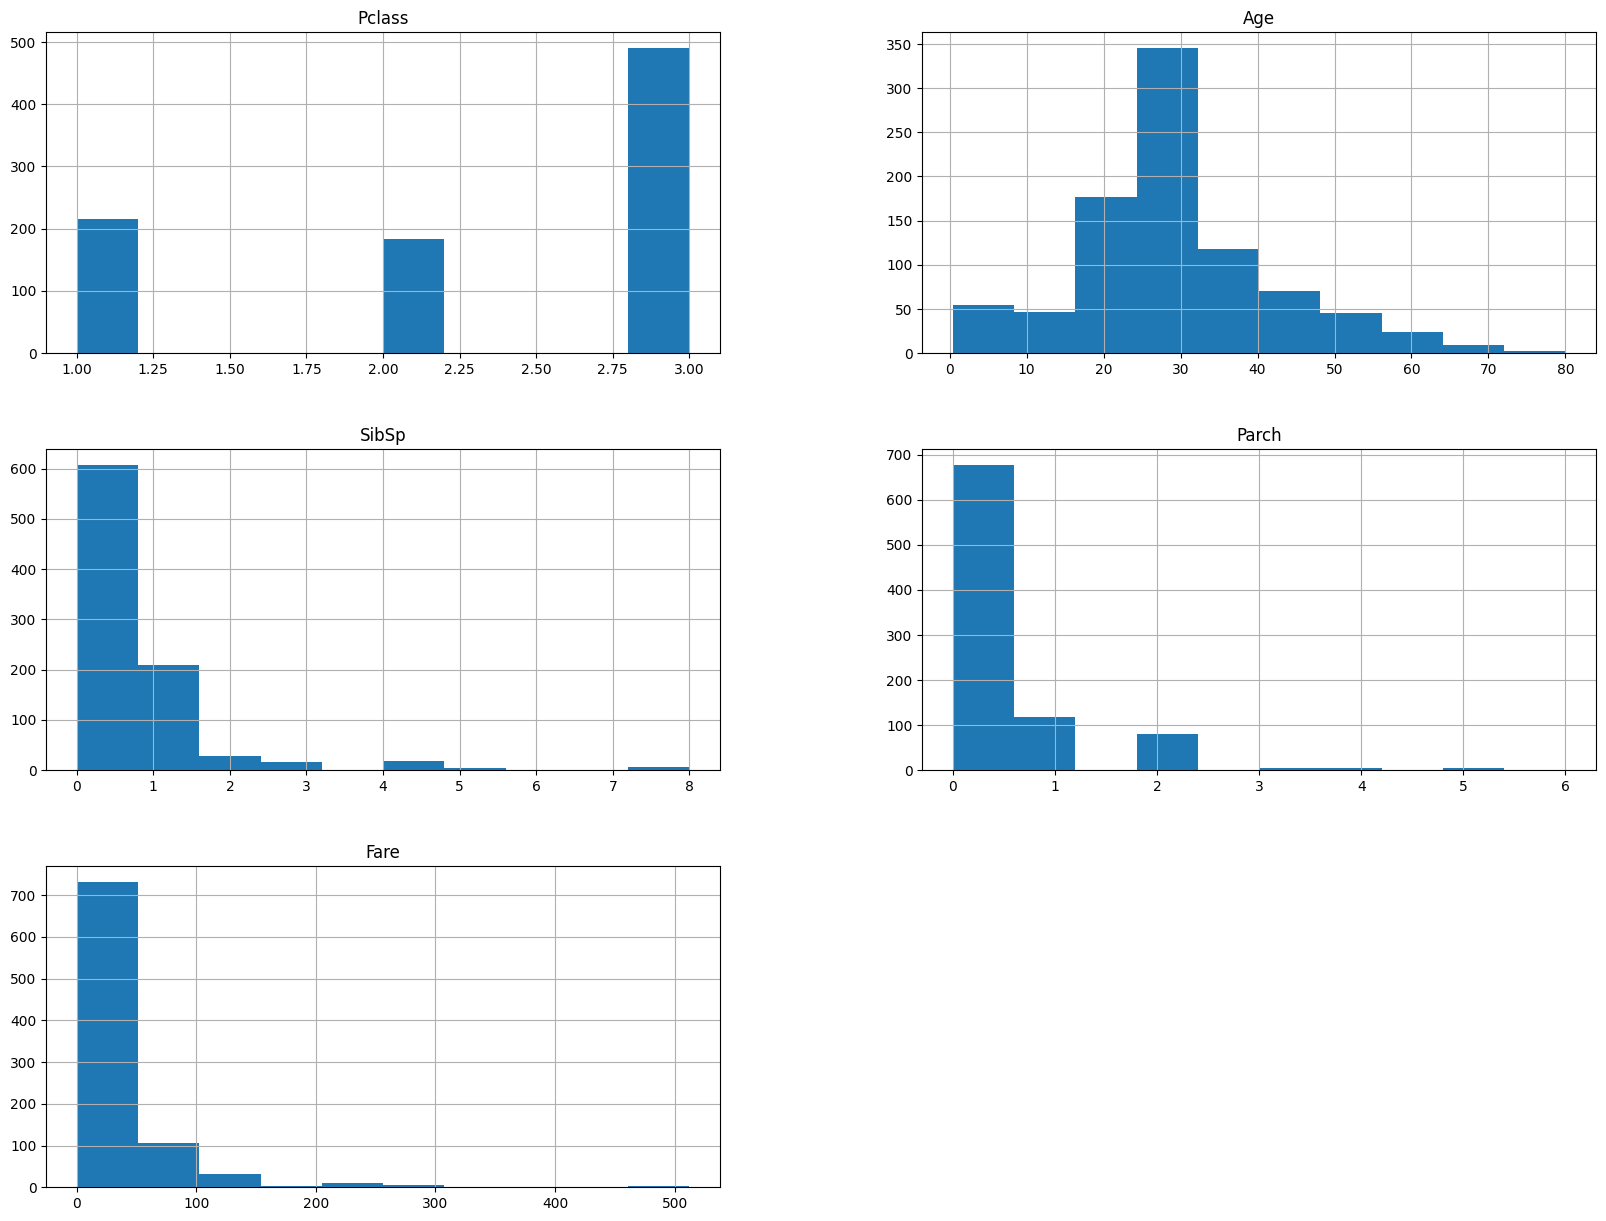

In [ ]:
X.hist(figsize=(20,15))
plt.show()